In [1]:
import pandas as pd 
import re #regular expression

In [2]:
f= open('WhatsApp Chat with Unofficial MCA 2024.txt','r',encoding='utf-8') #using file handelling to open text file

In [3]:
data = f.read() #reading file in form of string and storing it in data 

In [4]:
print(data)

21/09/2022, 10:01 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
21/09/2022, 09:52 - ~ Mukul created group "Unofficial MCA 2022"
21/09/2022, 10:01 - You joined using this group's invite link
21/09/2022, 10:01 - +91 74092 42509 joined using this group's invite link
21/09/2022, 10:01 - +91 90127 57977 joined using this group's invite link
21/09/2022, 10:01 - +91 80064 00305 joined using this group's invite link
21/09/2022, 10:01 - +91 6397 732 039 joined using this group's invite link
21/09/2022, 10:02 - +91 99976 93000 joined using this group's invite link
21/09/2022, 10:02 - Deepanshu MCA joined using this group's invite link
21/09/2022, 10:02 - +91 74098 88475 joined using this group's invite link
21/09/2022, 10:02 - Gaurave Dangwal Mca joined using this group's invite link
21/09/2022, 10:02 - +91 82797 53751 joined using this group's invite link
21/09/2022, 10:02 - +91 97589 22320 joined us

In [5]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages = re.split(pattern,data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '~\u202fMukul created group "Unofficial MCA 2022"\n',
 "You joined using this group's invite link\n",
 "+91 74092 42509 joined using this group's invite link\n",
 "+91 90127 57977 joined using this group's invite link\n",
 "+91 80064 00305 joined using this group's invite link\n",
 "+91 6397 732 039 joined using this group's invite link\n",
 "+91 99976 93000 joined using this group's invite link\n",
 "Deepanshu MCA joined using this group's invite link\n",
 "+91 74098 88475 joined using this group's invite link\n",
 "Gaurave Dangwal Mca joined using this group's invite link\n",
 "+91 82797 53751 joined using this group's invite link\n",
 "+91 97589 22320 joined using this group's invite link\n",
 "Rajat Singh Mca (Java) joined using this group's invite link\n",
 "+91 6398 325 611 joined using this group's invite link\n",
 "+91 74519 58189 jo

In [7]:
dates = re.findall(pattern,data)
dates

['21/09/2022, 10:01 - ',
 '21/09/2022, 09:52 - ',
 '21/09/2022, 10:01 - ',
 '21/09/2022, 10:01 - ',
 '21/09/2022, 10:01 - ',
 '21/09/2022, 10:01 - ',
 '21/09/2022, 10:01 - ',
 '21/09/2022, 10:02 - ',
 '21/09/2022, 10:02 - ',
 '21/09/2022, 10:02 - ',
 '21/09/2022, 10:02 - ',
 '21/09/2022, 10:02 - ',
 '21/09/2022, 10:02 - ',
 '21/09/2022, 10:02 - ',
 '21/09/2022, 10:03 - ',
 '21/09/2022, 10:03 - ',
 '21/09/2022, 10:03 - ',
 '21/09/2022, 10:03 - ',
 '21/09/2022, 10:03 - ',
 '21/09/2022, 10:03 - ',
 '21/09/2022, 10:03 - ',
 '21/09/2022, 10:03 - ',
 '21/09/2022, 10:03 - ',
 '21/09/2022, 10:03 - ',
 '21/09/2022, 10:04 - ',
 '21/09/2022, 10:04 - ',
 '21/09/2022, 10:04 - ',
 '21/09/2022, 10:04 - ',
 '21/09/2022, 10:05 - ',
 '21/09/2022, 10:05 - ',
 '21/09/2022, 10:05 - ',
 '21/09/2022, 10:05 - ',
 '21/09/2022, 10:05 - ',
 '21/09/2022, 10:05 - ',
 '21/09/2022, 10:05 - ',
 '21/09/2022, 10:06 - ',
 '21/09/2022, 10:06 - ',
 '21/09/2022, 10:06 - ',
 '21/09/2022, 10:06 - ',
 '21/09/2022, 10:07 - ',


In [8]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})  # Convert message_data type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')

df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-09-21 10:01:00
1,"~ Mukul created group ""Unofficial MCA 2022""\n",2022-09-21 09:52:00
2,You joined using this group's invite link\n,2022-09-21 10:01:00
3,+91 74092 42509 joined using this group's invi...,2022-09-21 10:01:00
4,+91 90127 57977 joined using this group's invi...,2022-09-21 10:01:00


In [9]:
df.shape

(15291, 2)

In [10]:
#saperate users and messages
users = []
messages = []
for message in df['user_message']:
        entry = re.split('([\w\W]+?):\s', message)
        if entry[1:]:  # user name
            users.append(entry[1])
            messages.append(entry[2:])
        else:
            users.append('group_notification')
            messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
df.head()

,date,user,message
0,2022-09-21 10:01:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-09-21 09:52:00,group_notification,"~ Mukul created group ""Unofficial MCA 2022""\n"
2,2022-09-21 10:01:00,group_notification,You joined using this group's invite link\n
3,2022-09-21 10:01:00,group_notification,+91 74092 42509 joined using this group's invi...
4,2022-09-21 10:01:00,group_notification,+91 90127 57977 joined using this group's invi...


In [11]:
df['year'] = df['date'].dt.year

In [12]:
df.head()

,date,user,message,year
0,2022-09-21 10:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022
1,2022-09-21 09:52:00,group_notification,"~ Mukul created group ""Unofficial MCA 2022""\n",2022
2,2022-09-21 10:01:00,group_notification,You joined using this group's invite link\n,2022
3,2022-09-21 10:01:00,group_notification,+91 74092 42509 joined using this group's invi...,2022
4,2022-09-21 10:01:00,group_notification,+91 90127 57977 joined using this group's invi...,2022


In [13]:
df['month'] = df['date'].dt.month_name()

In [14]:
df['day'] = df['date'].dt.day

In [15]:
df['hour'] = df['date'].dt.hour

In [16]:
df['minute'] = df['date'].dt.minute

In [17]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-09-21 10:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,September,21,10,1
1,2022-09-21 09:52:00,group_notification,"~ Mukul created group ""Unofficial MCA 2022""\n",2022,September,21,9,52
2,2022-09-21 10:01:00,group_notification,You joined using this group's invite link\n,2022,September,21,10,1
3,2022-09-21 10:01:00,group_notification,+91 74092 42509 joined using this group's invi...,2022,September,21,10,1
4,2022-09-21 10:01:00,group_notification,+91 90127 57977 joined using this group's invi...,2022,September,21,10,1


In [18]:
words = []
for message in df['message']:
    for message in message:
        words.extend(message.split())


In [19]:
!pip install urlextract


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("let's www.gmail.com have URL stackoverflow.com as an example google.com, https://swayam.gov.in/explorer")
urls

['www.gmail.com',
 'stackoverflow.com',
 'google.com',
 'https://swayam.gov.in/explorer']

In [31]:
y = []
for message in df['message']:
    # Convert message to string if it's not already
    message_str = str(message)
    # Find URLs in the message and extend the list y
    y.extend(extractor.find_urls(message_str))

In [32]:
len(y)

251

In [33]:
df

,date,user,message,year,month,day,hour,minute
0,2022-09-21 10:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,September,21,10,1
1,2022-09-21 09:52:00,group_notification,"~ Mukul created group ""Unofficial MCA 2022""\n",2022,September,21,9,52
2,2022-09-21 10:01:00,group_notification,You joined using this group's invite link\n,2022,September,21,10,1
3,2022-09-21 10:01:00,group_notification,+91 74092 42509 joined using this group's invi...,2022,September,21,10,1
4,2022-09-21 10:01:00,group_notification,+91 90127 57977 joined using this group's invi...,2022,September,21,10,1
...,...,...,...,...,...,...,...,...
15286,2024-04-08 20:09:00,+91 74092 42509,[Nevermind I got them!\n],2024,April,8,20,9
15287,2024-04-09 08:53:00,+91 74092 42509,[Those having mid term DBMS practical today Co...,2024,April,9,8,53
15288,2024-04-16 00:25:00,+91 98998 62283,[<Media omitted>\n],2024,April,16,0,25
15289,2024-04-16 00:25:00,+91 98998 62283,[<Media omitted>\n],2024,April,16,0,25


In [37]:
x = df['user'].value_counts().head()

In [36]:
import matplotlib.pyplot as plt

In [38]:
name = x.index
count = x.values

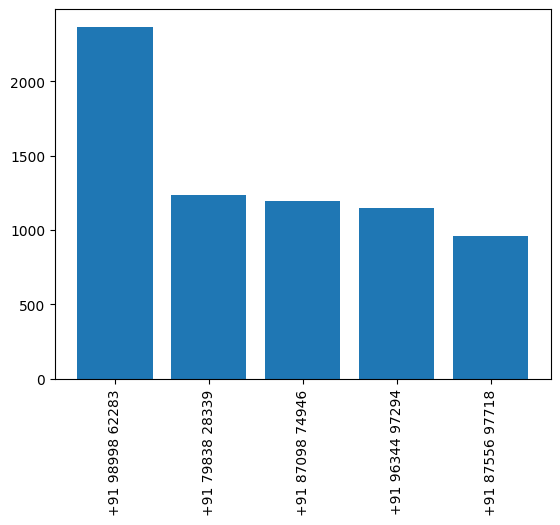

In [41]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [52]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'user':'name','count':'percent'})

,name,percent
0,+91 98998 62283,15.47
1,+91 79838 28339,8.10
2,+91 87098 74946,7.82
3,+91 96344 97294,7.53
4,+91 87556 97718,6.29
...,...,...
129,+91 81711 29417,0.01
130,+91 78952 10045,0.01
131,+91 74510 49705,0.01
132,+91 70888 11979,0.01


In [113]:
temp = df[df['user']!='group_notification']
temp = temp[temp['message'] !='<Media omitted>\n']

In [122]:
temp.head(20)

,date,user,message,year,month,day,hour,minute
55,2022-09-21 10:11:00,+91 78954 38079,[<Media omitted>\n],2022,September,21,10,11
56,2022-09-21 10:11:00,+91 78954 38079,[Invite your friends\n],2022,September,21,10,11
57,2022-09-21 10:11:00,+91 79838 28339,[invite your friends\n],2022,September,21,10,11
58,2022-09-21 10:11:00,+91 78954 38079,[Only MCA\n],2022,September,21,10,11
63,2022-09-21 12:15:00,+91 91190 22262,[https://geuac-my.sharepoint.com/:f:/g/persona...,2022,September,21,12,15
67,2022-09-21 12:17:00,+91 70601 34446,[1980\n],2022,September,21,12,17
68,2022-09-21 12:17:00,+91 96344 97294,[<Media omitted>\n],2022,September,21,12,17
69,2022-09-21 12:17:00,+91 76183 46949,[<Media omitted>\n],2022,September,21,12,17
70,2022-09-21 12:18:00,+91 96274 20295,[<Media omitted>\n],2022,September,21,12,18
71,2022-09-21 12:18:00,+91 91190 22262,[<Media omitted>\n],2022,September,21,12,18


In [115]:
f= open('stop_hinglish.txt','r')
stop_words= f.read()

In [116]:
words = []
for message in temp['message']:
    if isinstance(message, str):
        for word in message.lower().split():
            if word not in stop_words:
                words.append(word)

In [117]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

""


                  date             user  \
55 2022-09-21 10:11:00  +91 78954 38079   
56 2022-09-21 10:11:00  +91 78954 38079   
57 2022-09-21 10:11:00  +91 79838 28339   
58 2022-09-21 10:11:00  +91 78954 38079   
63 2022-09-21 12:15:00  +91 91190 22262   

                                              message  year      month  day  \
55                                [<Media omitted>\n]  2022  September   21   
56                            [Invite your friends\n]  2022  September   21   
57                            [invite your friends\n]  2022  September   21   
58                                       [Only MCA\n]  2022  September   21   
63  [https://geuac-my.sharepoint.com/:f:/g/persona...  2022  September   21   

    hour  minute  
55    10      11  
56    10      11  
57    10      11  
58    10      11  
63    12      15  
